In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

In [3]:
data = pd.read_csv("AB_NYC_2019.csv")

In [4]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [7]:
data.shape

(48895, 16)

In [8]:
data.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


#### Checking for missing values

In [9]:
data.isnull().values.any()

True

In [10]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
if len(data[data.isnull().any(axis = 1)]) !=0:
    print("Num of missing values:{}".format(len(data[data.isnull().any(axis=1)])))
else:
    print("No missing values")

Num of missing values:10074


In [12]:
data.isnull().any(axis = 1)

0        False
1        False
2         True
3        False
4        False
         ...  
48890     True
48891     True
48892     True
48893     True
48894     True
Length: 48895, dtype: bool

<AxesSubplot:>

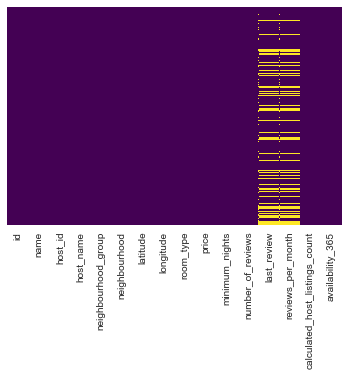

In [13]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<function matplotlib.pyplot.show(close=None, block=None)>

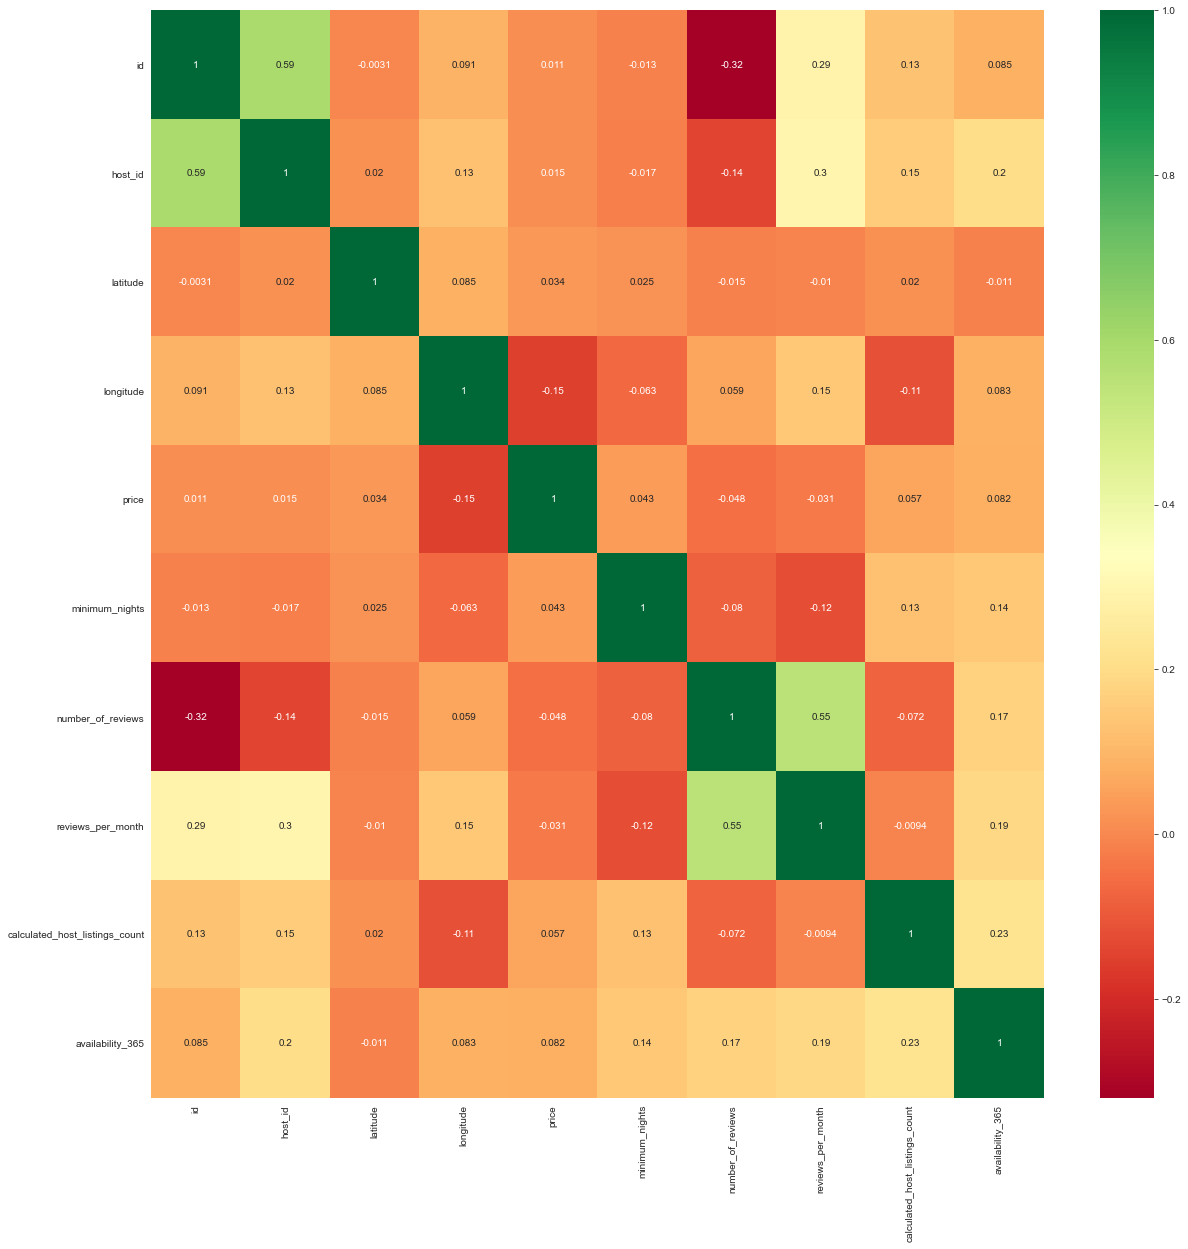

In [14]:
corr_mat = data.corr()
top_corr_features =corr_mat.index

plt.figure(figsize=(20,20))
sns.heatmap(data[top_corr_features].corr(), annot  = True, cmap='RdYlGn' )
plt.show

In [15]:
data.drop(['id','host_name','last_review'], axis = 1,inplace=True) 

In [16]:
data.isnull().sum()

name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### Replacing missing values in reviews_per_month with 0 and name with *NoName*

In [17]:
data.reviews_per_month.fillna(value=0,inplace=True)
data.name.fillna("NoName", inplace=True)

In [18]:
data.isnull().sum()

name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [19]:
data.shape

(48895, 13)

In [20]:
data.head(20)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
6,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,Large Furnished Room Near B'way,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
9,Cute & Cozy Lower East Side 1 bdrm,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188


#### EDA

In [21]:
data["price"].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [22]:
data['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

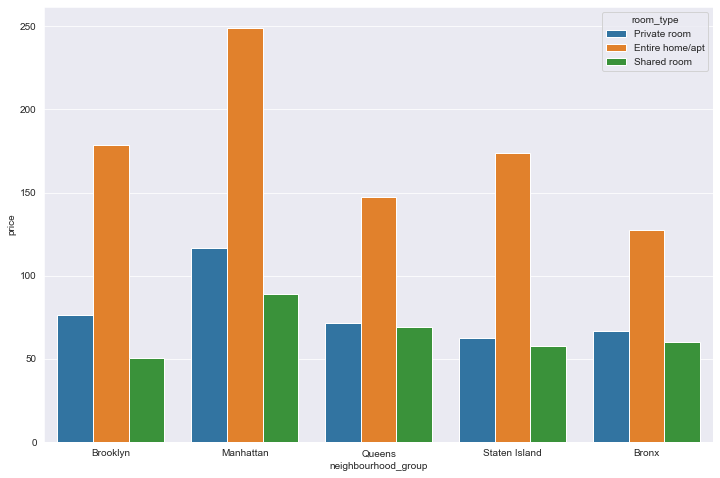

In [23]:
plt.figure(figsize=(12,8))
sns.barplot(x=data["neighbourhood_group"],y=data["price"], hue = data['room_type'],ci =None)

Insights from above bar plot:

Manhattan is the most expensive region in neighbourhood group.

Bronx is the cheapest amoung neighbourhood groups.

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

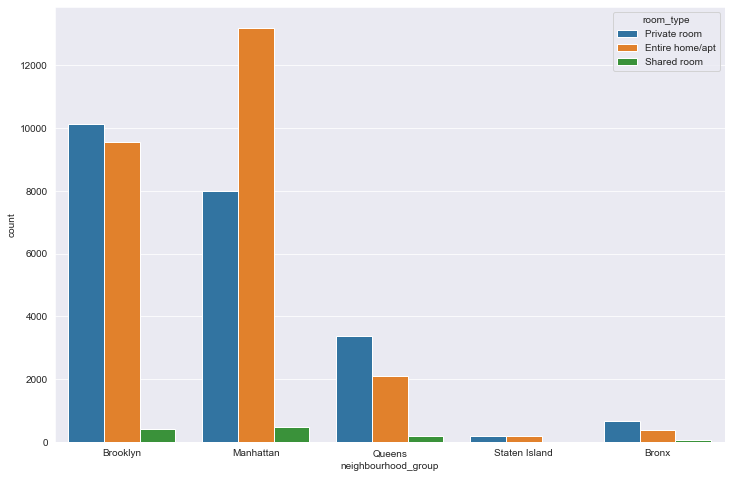

In [24]:
plt.figure(figsize=(12,8))
sns.countplot(data.neighbourhood_group,hue=data.room_type)

Insights from the above barplot:

Staten Island and Bronx have the least number of entries.

Manhattan and Brooklyn neighbourhoods have far max. number of entries.

Coclusion: Manhattan and Brooklyn are comparatively safer areas than Staten Island and Bronx.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

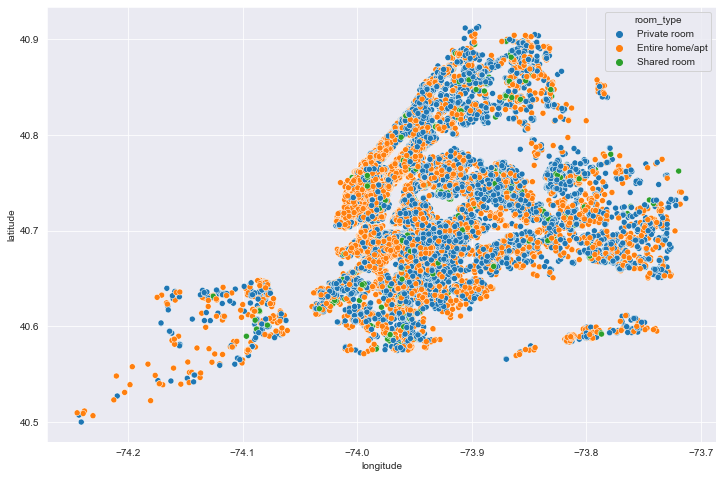

In [30]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=data.longitude,y=data.latitude,hue=data.room_type)

Conclusion: Num(private room  & entire home/apt) > Num(Shared room).Therefore,people prefer private rooms and entire apts/homes
            over shared rooms.
            
             

In [31]:
data['name'].value_counts()

Hillside Hotel                                       18
Home away from home                                  17
New york Multi-unit building                         16
NoName                                               16
Brooklyn Apartment                                   12
                                                     ..
Sonder | The Nash | Lively 1BR + Grilling Area        1
Awesome Private Artist Studio for FEMALE Traveler     1
24 Lex Prime Location of East NYC 15min to TimeSq     1
Cozy Upper West Side Apartment                        1
Light Filled 1BDRM in Clinton Hill                    1
Name: name, Length: 47906, dtype: int64

#### Modeling

In [32]:
main_df = data.copy()

In [33]:
main_df.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [34]:
type(main_df)

pandas.core.frame.DataFrame

In [35]:
main_df.shape

(48895, 13)

In [36]:
data.drop(["name","latitude","longitude", "host_id", "neighbourhood"], axis=1, inplace=True)

In [37]:
data.head()

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,9,0.21,6,365
1,Manhattan,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Private room,150,3,0,0.00,1,365
3,Brooklyn,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
#creating dummy varibles for neighbourhood_group and room_type

In [38]:
data_new = pd.get_dummies(data,columns=['neighbourhood_group','room_type'],prefix = ['ng','rt'], drop_first=True)

In [39]:
data_new.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,ng_Brooklyn,ng_Manhattan,ng_Queens,ng_Staten Island,rt_Private room,rt_Shared room
0,149,1,9,0.21,6,365,1,0,0,0,1,0
1,225,1,45,0.38,2,355,0,1,0,0,0,0
2,150,3,0,0.00,1,365,0,1,0,0,1,0
3,89,1,270,4.64,1,194,1,0,0,0,0,0
4,80,10,9,0.10,1,0,0,1,0,0,0,0


In [40]:
data.shape

(48895, 8)

In [41]:
data_new.shape

(48895, 12)

In [42]:
main_df.shape

(48895, 13)

In [43]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [44]:
X= data_new.loc[:, data_new.columns != 'price']

In [45]:
y= data_new["price"]

In [46]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.20, random_state=42)

In [47]:
regressor = LinearRegression().fit(x_train1, y_train1)

In [48]:
regressor.score(x_train1,y_train1)

0.08879842730108134

In [49]:

y_pred = regressor.predict(x_test1)

In [50]:
rmse = np.sqrt(metrics.mean_squared_error(y_test1, y_pred))
rmse

197.7300491183017

In [52]:
from scipy import stats

In [52]:
!pip install statsmodels

In [53]:
import statsmodels.api as sm

In [54]:

X2 = sm.add_constant(x_train1)
estimate = sm.OLS(y_train1, X2)
estimate_1 = estimate.fit()
print(estimate_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     346.4
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:00:57   Log-Likelihood:            -2.6920e+05
No. Observations:               39116   AIC:                         5.384e+05
Df Residuals:                   39104   BIC:                         5.385e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Conclusion:

We first look at the Adjusted R square value since this is a Multiple linear regression. It tell us that our independent variables can explain 8,9% of variations in our dependent variable. This is quite low.

The constant or the y intercept has a value of 142.24. This means that putting all other x variables at zero, an Entire Apt/Home in Bronx will have a predicted price of 142.24. When we created dummy variables, we dropped one dummy from each column which we use as reference.

P values suggests how significant these estimates are. Considering alpha of 0.05, all variables, except minimum_nights, ng_Queens, ng_Staten Island, are statistically significant.

In [59]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.image as pltimg
from sklearn.metrics import accuracy_score

In [60]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf_gini.fit(x_train1, y_train1)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [61]:
import graphviz 

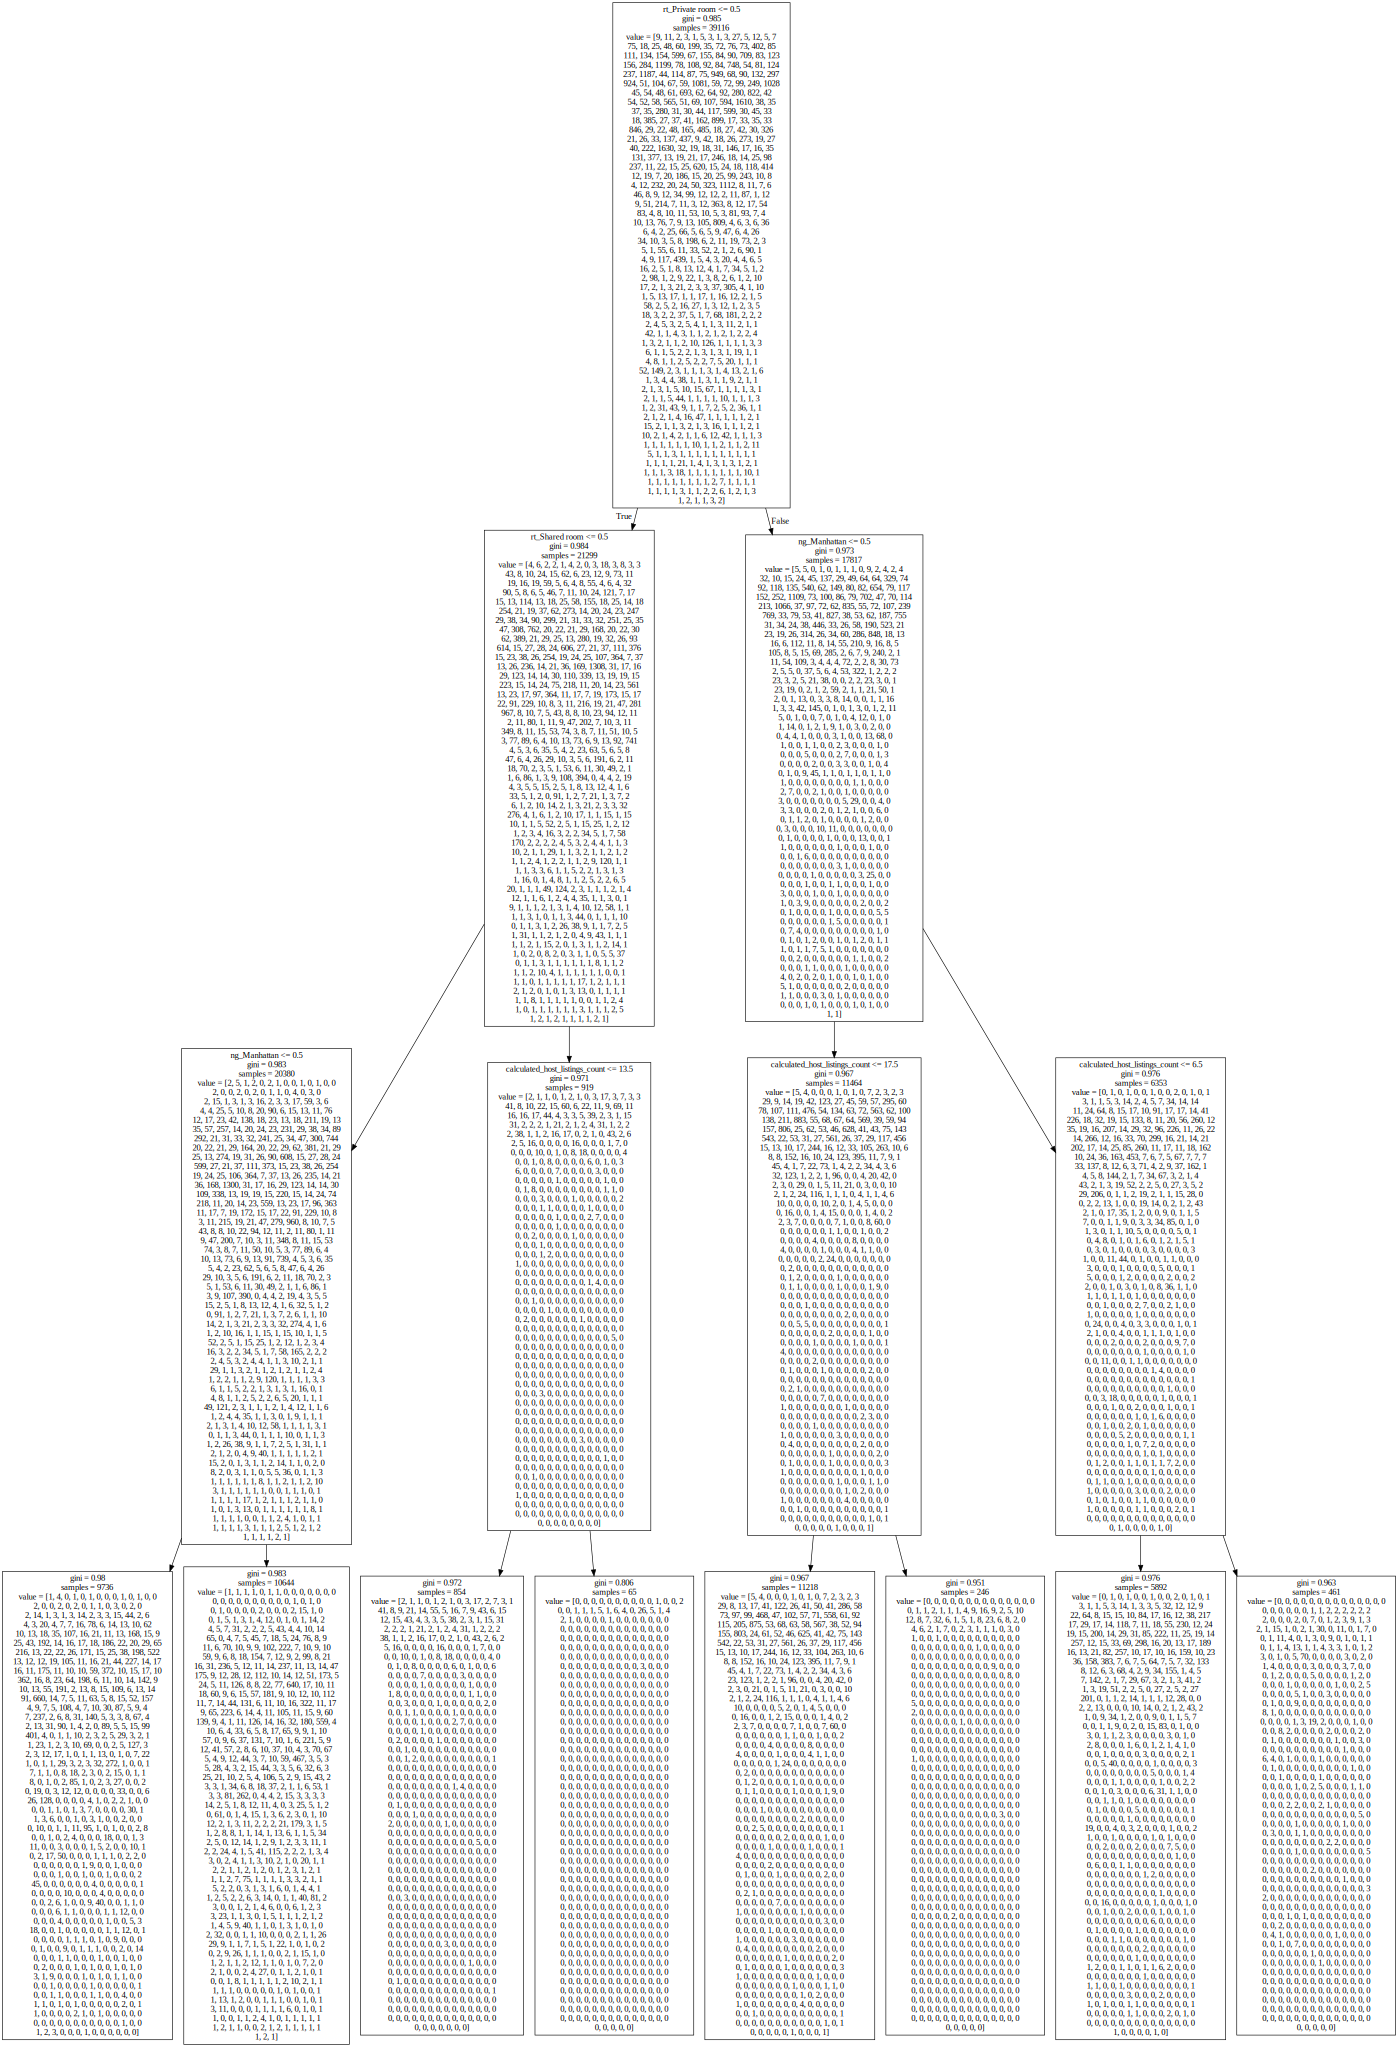

In [62]:

dot_data = tree.export_graphviz(clf_gini, out_file = None, feature_names = x_train1.columns)

graph = graphviz.Source(dot_data) 

graph